Для исследования нами получены данные опубликованные на портале открытых данных Министерства культуры Российской Федерации - это архив кинофильмов вышедших в прокат с 2010 по 2019гг. Данные содержат информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а так же информацию о рейтингах с КиноПоиск. 

Цель исследования
1. Изучить рынок российского кинопроката и выявить текущие тренды.
2. Изучить фильмы получившие господдержку - выяснить насколько такие фильмы интересны зрителю, выявить другие тренд.

Задачи исследования:
1. Установить сколько фильмов получало прокатное удостоверение каждый год. Вычислить, какая доля из них выходила в прокат.
2. Вычислить в каком году была минимальная и максимальная сумма сборов.
3. Вычислить среднюю и медианную сумму сборов для каждого года.
4. Определить как возрастные ограничения влияют на сборы денег в прокате.
5. Вычислить сколько было выделено денег на поддержку кино.
6. Понять, окупаются ли фильмы отечественного производства.
7. Вычислить средний рейтинг для фильмов с господдержкой.
8. Определить названия конкретных картин выпуск которых можно считать удачным (высокий рейтинг, окупаемость).

## Исследование данных о российском кинопрокате



### Шаг 1. Открытие файла с данными и объединение их в один датафрейм. 


В нашем доступе 2 таблицы. Импортируем необходимые для проекта библиотеки pandas и pyplot. Прочитаем таблицы

In [1]:
#импортируем библиотеку pandas
import pandas as pd
#импортируем библиотеку pyplot
import matplotlib.pyplot as plt
#добавим команду, которая позволит выводить таблицы со всеми ее столбцами
pd.set_option('display.max_columns', None)
#добавим команду, которая позволит не подрезать нли в таблицах
pd.options.display.float_format = '{:.5f}'.format
#читаем файл mkrf_movies
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
#читаем файл mkrf_shows
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
#посмотрим общее инфо о таблице mkrf_movies
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [2]:
#посмотрим общее инфо о таблице mkrf_shows
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [3]:
#мы будем объединять таблицы по столбцу puNumber. для объединения столбец в обеих ячейках должен иметь один тип. приведем puNumber в таблице mkrf_movies к типу int64
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'], errors = 'coerce')
#проверим
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
# объединим таблицы
data = mkrf_movies.merge(mkrf_shows, on = 'puNumber', how = 'left')
#посмотрим объединенную таблицу, выведем первые 5 строк датафрейма на экран
data.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.00000,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.00000,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416.00000,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.00000,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.00000,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Мы провели полное объединения двух таблиц по столбцу puNumber (прокатное удостоверение). Далее будем работать с этим объединенным датафреймом.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проврка типа данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [5]:
#выведем инфо о датафрейме состоящем из 2х таблиц
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [6]:
#изменим тип данных для show_start_date на datetime()
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

#изменим тип данных для ratings на float64
data['ratings'] = pd.to_numeric(data['ratings'], errors = 'coerce')

#проверим тип данных в таблице после внесенных изменений
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7485 non-null   float64            
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Изучим пропуски в датафрейме


In [7]:
#выведем количество пропущенных значений для каждого столбца таблицы
data.isna().sum()

title                       0
puNumber                    1
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

- puNumber - удалим строку с пропущенным значением. потому что это главный идентификатор;
- director - режиссер. заполним отсутствующие значение "unknown" т.к. данный столбец понадобиться нам далее;
- genres - жанр. заполним отсутствующие значение "unknown" т.к. данный столбец понадобиться нам далее;
- refundable_support, nonrefundable_support, budget, financing_source  - очень много пропусков. удалять не будем. пропуски в данных столбцах связаны с тем, что в таблице как фильмы отечественного производства (с господдержкой) так и фильмы зарубежного производства (господдержки у которыз, конечно же, не было) - отсутствие значений в этих строках нормально; 
- film_studio, production_county, producer - нельзя заполнить какими-либо случайными (или чаще повторяющимися) значениями - такие данные можно только найти и ввести их в таблицу;
- ratings - вероятно, не все фильмы получали оценки. реальных значений больше, их достаточно для оценки. не будем заполнять средними/медианными числами;
- box_office - данные о сборах могут быть только у тех фильмов, что были в прокате. заполнять данный столбец средними/медианными значениями - некорректно. 

In [8]:
#удалим отсутствующее значение в puNumber
data = data.dropna(subset = ['puNumber'])

#заполним пропуски в genres на unknown
data['genres'] = data['genres'].fillna('unknown')

#заполним пропуски в director на unknown
data['director'] = data['director'].fillna('unknown')

#### Шаг 2.3. Изучим дубликаты в датафрейме

In [9]:
#проверм наличие явных дубликатов в столбце title (название фильма)
data['title'].duplicated().sum()

714

В столбце с названием фильма 714 дубликатов. Мы не будем удалять дубликаты из данного столбца.

In [10]:
#проверм наличие явных дубликатов в столбце puNumber (номер прокатного удостоверения)
data['puNumber'].duplicated().sum()

2

In [11]:
#удалим дубликаты из данного столбца
data = data.drop_duplicates(subset=['puNumber'])

Дубликаты для столбцов: type, film_studio, production_country, director, producer, age_restriction, financing_source, genres - нормальны. В этих столбцах могут встречаться повторяющиеся значения.

#### Шаг 2.4. Изучим категориальные значения


In [12]:
data.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.00000,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20000,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.00000,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60000,"драма,военный",NaN
2,Особо опасен,221038416.00000,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80000,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.00000,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80000,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.00000,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80000,"фантастика,боевик,триллер",NaN


Категориальные столбцы:
- type
- production_country
- financing_source
- ratings
- age_restriction
- genres

In [13]:
#посмотрим уникальные значения для type
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [14]:
#проблема данного столбца - лишний пробел перед знаками. исправим это с помощью метода strip()
data['type'].str.strip()

0       Художественный
1       Художественный
2       Художественный
3       Художественный
4       Художественный
             ...      
7481            Прочие
7482    Художественный
7483    Художественный
7484      Анимационный
7485      Анимационный
Name: type, Length: 7483, dtype: object

In [15]:
#проверим столбец production_country на уникальные значения
data['production_country'].unique()

#очень много значений

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [16]:
#проверим столбец financing_source на уникальные значения
data['financing_source'].unique()

#по значениям - все нормально

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [17]:
#проверим столбец ratings на уникальные значения
data['ratings'].unique()

#по значениям - все нормально. но шкала значений слишком подробная

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

In [18]:
#проверим столбец age_restriction на уникальные значения
data['age_restriction'].unique()

#по значениям - все нормально

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [19]:
#проверим столбец genres на уникальные значения
data['genres'].unique()

#здесь очень много значений. обработаем этот столбец ниже

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'unknown', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комед

- Одна из основных проблем в данных столбцах - встречаются неявные дубликаты. Например, в "жанр фильма" встречаются значения: 'мелодрама,драма' и 'драма,мелорама'. А в "страна-производитель": 'Бразилия - США' и 'США - Бразилия' - оба примера - это неявные дубликаты. Из-за этого получается много уникальных значений, которые трудно обрабатывать, проводить по ним группировки и осуществлять анализ данных. 
- Есть и явные дубликаты типа: 'СССР  ', 'СССР ', ' СССР ', ' СССР   ', 'СССР     '. - значения с разным количеством пробелов.
- Есть и ошибка. Например в "страна-производитель" значение: '2019'.


#### Шаг 2.5. Проверим количественные значения

Проверим значения в количественных столбцах

In [20]:
#посмотрим в каком соотношении сумма поддержки на производство фильма и бюджет фильма
#сумма поддержки состоит из возвратных и невозвратных инвестиций
sum_support = data['refundable_support'].sum() + data['nonrefundable_support'].sum()
sum_support

20200688312.0

In [21]:
#посмотрим сумму бюджета в фильмах, которые получили госпооержку
sum_budget_with_support = data.query('financing_source==financing_source')['budget'].sum()
sum_budget_with_support

42240265939.0

In [22]:
#посчитаем сумма поддержки в рамках всего бюджета фильма
share_support = sum_support / sum_budget_with_support
share_support

0.47823298132573816

Порядка 50% - доля господдержки в рамках всего бюджета фильма. Невозвратных инвестиций 1/3. 

In [23]:
#посмотрим значени в refundable_support методом describe
data['refundable_support'].describe()


count         332.00000
mean     11864457.83133
std      24916555.26364
min             0.00000
25%             0.00000
50%             0.00000
75%      15000000.00000
max     180000000.00000
Name: refundable_support, dtype: float64

<AxesSubplot:>

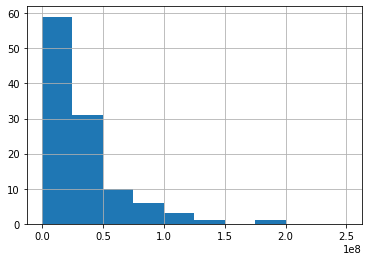

In [24]:
#постоим гистограмму для столбца refundable_support
data['refundable_support'].hist(bins = 10, range = (1, 250000000))

#здесь все что выше 150 000 000 - единичные значения. но значений не много

In [25]:
#посмотрим значени в refundable_support методом describe
data['nonrefundable_support'].describe()
#среднее знаение намного выше медианного. некоторые фильмы получили очень польшу господдержку

count         332.00000
mean     48980988.89157
std      59980117.92330
min             0.00000
25%      25000000.00000
50%      30000000.00000
75%      40375000.00000
max     400000000.00000
Name: nonrefundable_support, dtype: float64

<AxesSubplot:>

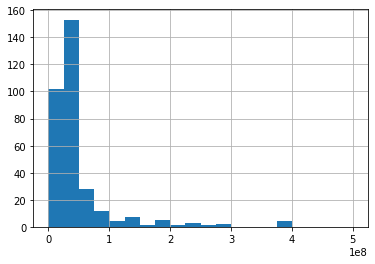

In [26]:
#постоим гистограмму для столбца refundable_support
data['nonrefundable_support'].hist(bins = 20, range = (1, 500000000))

In [27]:
#посмотрим значени в budget методом describe
data['budget'].describe()

#у среднего и медианы разница в 2 раза. есть фильмы с нулевым бюджетом - это нужно исправить

count          332.00000
mean     127229716.68373
std      188588333.11516
min              0.00000
25%       42000000.00000
50%       68649916.00000
75%      141985319.50000
max     2305074303.00000
Name: budget, dtype: float64

In [28]:
#сделаем срез, посмотрим таблицу с фильмами с нулевым бюдежтом
data.query('budget == 0').head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614.00000,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00000,23000000.00000,0.00000,"Министерство культуры, Фонд кино",6.60000,мелодрама,10234016.10000
2058,Дуxless 2,111000415.00000,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00000,75000000.00000,0.00000,Фонд кино,6.60000,драма,446163511.00000
2472,Воин (2015),111017315.00000,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00000,70000000.00000,0.00000,Фонд кино,7.80000,"боевик,драма,криминал",196572438.40000
2532,Бармен.,111009615.00000,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00000,0.00000,0.00000,Фонд кино,6.20000,"комедия,фэнтези",67418974.80000
2615,Савва. Сердце воина,114001715.00000,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00000,100000000.00000,0.00000,Фонд кино,4.60000,"мультфильм,приключения,фэнтези",184487551.40000


In [29]:
#сделаем срез, посмотрим таблицу в фильмами с нулевым бюдежтом, посмотрим страну-производитель у этих фильмов
data.query('budget == 0')['production_country'].unique()

array(['Россия'], dtype=object)

In [30]:
#в данном срезе только Россия. это фильмы получившие гос поддержку. заполним данные в "бюджет" суммой значений из refundable_support и nonrefundable_support
for d in data['budget']:
    data[data['budget'] == 0]
    data.loc[data['budget'] == 0, 'budget'] = data['refundable_support'] + data['nonrefundable_support']   

In [31]:
#после заполнения посмотрим значени в budget методом describe
data['budget'].describe()

count          332.00000
mean     131422395.79518
std      187148242.66687
min        6000000.00000
25%       45524799.50000
50%       71196901.50000
75%      150000000.00000
max     2305074303.00000
Name: budget, dtype: float64

<AxesSubplot:>

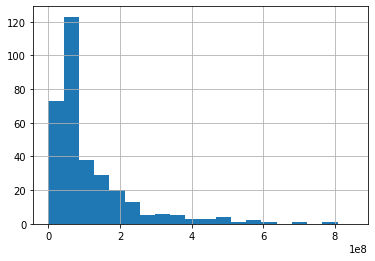

In [32]:
#постоим гистограмму для столбца budget
data['budget'].hist(bins = 20, range = (0, 850000000))

In [33]:
#добавим в таблицу столбец с суммой гос поддержки
data['gov_support'] = data['refundable_support'] + data['nonrefundable_support']   
#добавим в таблицу столбец с соотношением общего бюджета фильма и суммы гос поддержки
data['gov_support_budget'] = data['gov_support'] / data['budget'] 
#изменим тип данных для gov_support_budget
data['gov_support_budget'] = pd.to_numeric(data['gov_support_budget'], errors = 'coerce')
#отфильтруем таблицу. посмотрим, есть ли в gov_support_budget значения превышающие 1. у строк со значение выше 1 сумма господдержки больше общего бюджета
data.query('gov_support_budget > 1')

#таких значений нет

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,gov_support,gov_support_budget


#### Шаг 2.6. Добавим новые столбцы





In [34]:
#добавим в таблицу столбец с годом выхода фильма в прокат
data['year'] = data['show_start_date'].dt.year

In [35]:
#создадим функцию main_on_the_list_genre - функция оставит только первый вид жанра фильма
def main_on_the_list_genre(g, sep = ','):
    a = g.split(sep=sep)
    return a[0]
 
data['genres_main'] = data['genres'].apply(main_on_the_list_genre)

In [36]:
#создадим функцию main_on_the_list_director - функция оставит только первого режиссера из списка
def main_on_the_list_director(g, sep = ','):
    a = g.split(sep=sep)
    return a[0]
 
data['director_main'] = data['director'].apply(main_on_the_list_director)

In [37]:
#добавим столбец с информацией о том, какую долю от общего бюджета фильма составляет гос поддержка
sum_support =  data['refundable_support'] + data['nonrefundable_support']
data['share_support'] = sum_support /data['budget'] * 100

In [38]:
#проверим наличие всех новых столбцов
data.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,gov_support,gov_support_budget,year,genres_main,director_main,share_support
0,Открытый простор,221048915.00000,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20000,"боевик,драма,мелодрама",NaN,NaN,NaN,2015,боевик,Кевин Костнер,NaN
1,Особо важное задание,111013716.00000,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60000,"драма,военный",NaN,NaN,NaN,2016,драма,Е.Матвеев,NaN
2,Особо опасен,221038416.00000,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80000,"фантастика,боевик,триллер",NaN,NaN,NaN,2016,фантастика,Тимур Бекмамбетов,NaN
3,Особо опасен,221026916.00000,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80000,"фантастика,боевик,триллер",NaN,NaN,NaN,2016,фантастика,Тимур Бекмамбетов,NaN
4,Особо опасен,221030815.00000,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80000,"фантастика,боевик,триллер",NaN,NaN,NaN,2015,фантастика,Тимур Бекмамбетов,NaN


### Шаг 3. Проведем исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год.

In [39]:
#создадим сводную таблицу для параметров год и прокатное удостоверение
movies_box_office = data.pivot_table(index= 'year', values=['puNumber', 'box_office'], aggfunc='count')
#добавим в таблицу новый столбец с долей тех фильмов, что были в прокате в кинотеатре
movies_box_office['share_cinema'] = movies_box_office['box_office'] / movies_box_office['puNumber'] * 100
#выведем всю сводную таблицу
movies_box_office

,box_office,puNumber,share_cinema
year,,,
2010,105,983,10.68159
2011,109,622,17.52412
2012,128,593,21.58516
2013,184,630,29.20635
2014,279,806,34.61538
2015,465,705,65.95745
2016,526,818,64.30318
2017,357,505,70.69307
2018,475,891,53.31089


<AxesSubplot:title={'center':'Фильмы вышедшие в прокат'}, xlabel='Год', ylabel='Кол-во фильмов'>

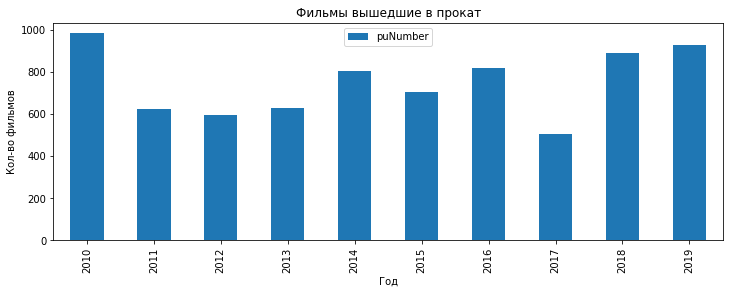

In [40]:
#построим график для таблицы
movies_box_office.plot(y = 'puNumber', kind = 'bar', figsize=(12, 4), title = 'Фильмы вышедшие в прокат', xlabel = 'Год', ylabel = 'Кол-во фильмов')

<AxesSubplot:title={'center':'Доля фильмов вышедших в прокат в кинотеатрах'}, xlabel='Год', ylabel='Кол-во фильмов'>

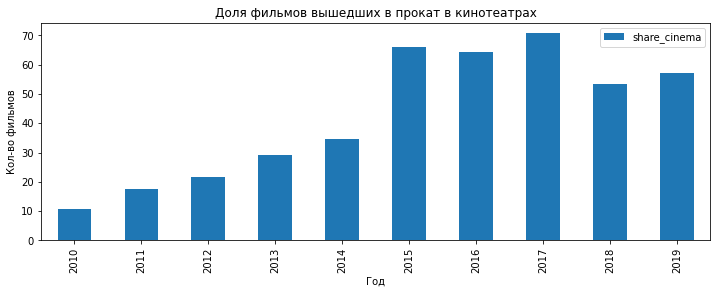

In [41]:
#построим график для таблицы
movies_box_office.plot(y = 'share_cinema', kind = 'bar', figsize=(12, 4), title = 'Доля фильмов вышедших в прокат в кинотеатрах', xlabel = 'Год', ylabel = 'Кол-во фильмов')

- количество фильмов, получивших прокатное удостоверение год к году не сильно отличается; 
- пики пришлись на 2010 и 2019гг (983 и 930 соответственно); 
- минимальное значение было в 2017г (505); 
- доля фильмов вышедших в прокат в кинотеатры напротив, увеличивалась год к году и достигла 70% в 2017г (2010г - 10%). В 2018-2019 произошло снижение до 53-56%. 

- Изучим, как менялась динамика проката по годам.

In [42]:
#создадим сводную таблицу для параметров год и сборы в рублях
sum_box_office_year = data.pivot_table(index= 'year', values=['box_office'], aggfunc='sum')
sum_box_office_year.columns = ['sum_box_office']
sum_box_office_year

,sum_box_office
year,
2010,2428654.00000
2011,14102765.00000
2012,6955423.00000
2013,29799706.20000
2014,7444951859.20000
2015,39497365196.40001
2016,47866299741.91004
2017,48563707217.51000
2018,49668403134.31999


In [43]:
sum_box_office_year['sum_box_office'].describe()

count            10.00000
mean    24151972247.71301
std     24138278781.26069
min         2428654.00000
25%        18027000.30000
50%     23471158527.80000
75%     48285856520.17001
max     49668403134.31999
Name: sum_box_office, dtype: float64

<AxesSubplot:title={'center':'Сборы в кинотеатрах по годам'}, xlabel='Год', ylabel='Сумма сборов'>

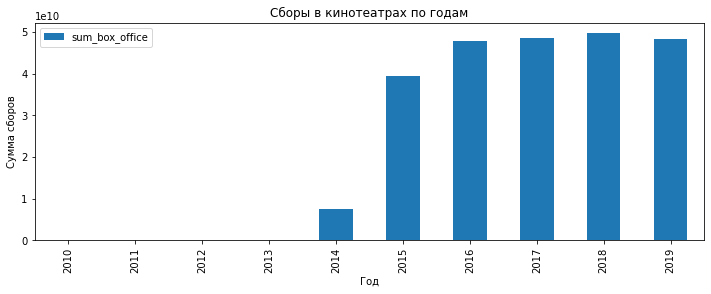

In [44]:
#построим график для таблицы
sum_box_office_year.plot(y = 'sum_box_office', kind = 'bar', figsize=(12, 4), title = 'Сборы в кинотеатрах по годам', xlabel = 'Год', ylabel = 'Сумма сборов')

Минимальная сумма сборов была в 2010 году (2 428 654 рублей), максимальная в 2017 году (48 561 554 266 рублей).  

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [45]:
#создадим сводную таблицу для параметров год и сборы в рублях
mean_median_box_office_year = data.pivot_table(index= 'year', values=['box_office'], aggfunc=['mean', 'median'])
mean_median_box_office_year.columns = ['mean', 'median']
mean_median_box_office_year

,mean,median
year,,
2010,23130.03810,1700.00000
2011,129383.16514,3000.00000
2012,54339.24219,5660.00000
2013,161954.92500,3522.50000
2014,26684415.26595,18160.00000
2015,84940570.31484,4920933.00000
2016,91000569.85154,3846679.41000
2017,136032793.32636,9968340.00000
2018,104565059.23015,8891102.21000


<AxesSubplot:title={'center':'Средняя сумма сборов по годам'}, xlabel='Год', ylabel='Ср сумма сборов'>

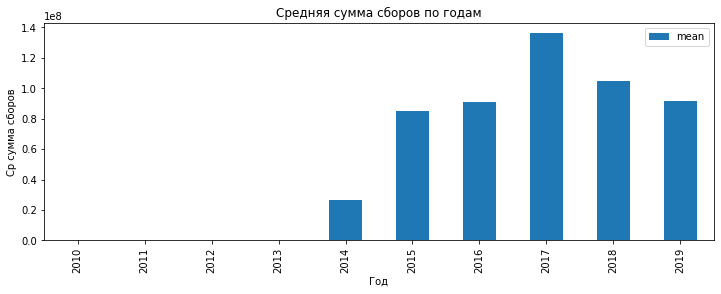

In [46]:
#построим график для таблицы
mean_median_box_office_year.plot(y = 'mean', kind = 'bar', figsize=(12, 4), title = 'Средняя сумма сборов по годам', xlabel = 'Год', ylabel = 'Ср сумма сборов')

<AxesSubplot:title={'center':'Медианная сумма сборов по годам'}, xlabel='Год', ylabel='Медианная сумма сборов'>

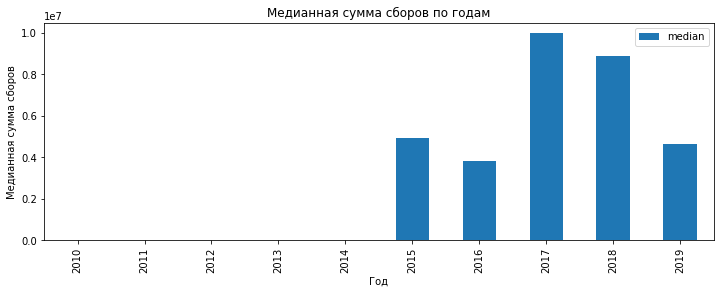

In [47]:
#построим график для таблицы
mean_median_box_office_year.plot(y = 'median', kind = 'bar', figsize=(12, 4), title = 'Медианная сумма сборов по годам', xlabel = 'Год', ylabel = 'Медианная сумма сборов')

В каждом исследуемом периоде средняя и медианные значения значительно различаются (более чем в 20р). Так, например, в 2016г: средняя = 91 000 569р, медиана = 3 846 679р. В 2019г: средняя = 91 369 261р, медианная = 4 627 798р.
Это можно объяснить тем, что в каждом периоде есть суперкассовые фильмы (мировые премьеры получившие в т.ч. большую медийную и промоподдержку) - такие фильмы единичны.  

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год

In [48]:
#создадим сводную таблицу для параметров возрастное ограничение аудитории и сборы по годам с 2015 по 2019г
sum_box_office_age_year = data.query('year <= 2019 and year >= 2015').pivot_table(index= 'year', columns = 'age_restriction', values=['box_office'], aggfunc='sum', margins=True)
sum_box_office_age_year

box_office  \
age_restriction «0+» - для любой зрительской аудитории   
year                                                     
2015                                   379054578.37000   
2016                                   150228848.67000   
2017                                   229598930.00000   
2018                                    32449002.11000   
2019                                    17746066.82000   
All                                    809077425.97000   

                                                 \
age_restriction «12+» - для детей старше 12 лет   
year                                              
2015                          13616082008.91000   
2016                          12204446524.39000   
2017                           7851427660.67000   
2018                          14267291660.69000   
2019                          12680198773.67000   
All                           60619446628.32999   

                                                                             \
age_restriction «16+» - для детей старше 16 лет «18+» - запрещено для детей   
year                                                                          
2015                          11368120870.27000            5432308367.44000   
2016                          16664548541.74000            6793929818.87000   
2017                          18745042900.06000            9651495581.02000   
2018                          16503602346.96000            8760085501.15000   
2019                          12753418984.60000           10121796303.64000   
All                           76034733643.62994           40759615572.12000   

                                                                  
age_restriction «6+» - для детей старше 6 лет                All  
year                                                              
2015                         8701799371.41000  39497365196.40001  
2016                        12053146008.24000  47866299741.91004  
2017                        12086142145.76000  48563707217.51000  
2018                        10104974623.41000  49668403134.31999  
2019                        12852548650.86000  48425708779.59000  
All                         55798610799.68002 234021484069.73001

In [49]:
#создадим сводную таблицу для параметров возрастное ограничение аудитории и количество фильмов по годам с 2015 по 2019г. 
count_box_office_age_year = data.query('year <= 2019 and year >= 2015').pivot_table(index= 'year', columns = 'age_restriction', values=['box_office'], aggfunc='count', margins=True)
count_box_office_age_year

box_office  \
age_restriction «0+» - для любой зрительской аудитории   
year                                                     
2015                                                39   
2016                                                41   
2017                                                 3   
2018                                                 5   
2019                                                 3   
All                                                 91   

                                                 \
age_restriction «12+» - для детей старше 12 лет   
year                                              
2015                                         73   
2016                                         82   
2017                                         41   
2018                                         67   
2019                                         85   
All                                         348   

                                                                             \
age_restriction «16+» - для детей старше 16 лет «18+» - запрещено для детей   
year                                                                          
2015                                        168                         132   
2016                                        182                         151   
2017                                        121                         147   
2018                                        156                         179   
2019                                        178                         183   
All                                         805                         792   

                                                     
age_restriction «6+» - для детей старше 6 лет   All  
year                                                 
2015                                       53   465  
2016                                       70   526  
2017                                       45   357  
2018                                       68   475  
2019                                       81   530  
All                                       317  2353

Возрастное ограничение влияет на сумму сборов. Так, наибольшие сборы у фильмов 16+ (эта же категория - лидер в общем количестве фильмов). Далее идут сборы у 12+ и 6+. И это несмотря на то, что количество фильмов в кагориях 16+ и 18+ одинаковое. 
В категории 18+ - много "авторских" фильмов, это контент для узкой аудитории. 
Ситуация менялась в 2018г, когда лидером, наряду с фильмами 16+, стали фильмы с возрастным ограничением 12+.
Также ситуация несколько отличалась в 2019г, когда лидером по сборам стали фильмы из категории 6+.
Вероятно, в эти годы выходили кассовые фильмы в категориях с данными возрастными ограничениями. 

In [101]:
count_box_office_age_year.columns

MultiIndex([('box_office', '«0+» - для любой зрительской аудитории'),
            ('box_office',        '«12+» - для детей старше 12 лет'),
            ('box_office',        '«16+» - для детей старше 16 лет'),
            ('box_office',            '«18+» - запрещено для детей'),
            ('box_office',          '«6+» - для детей старше 6 лет'),
            ('box_office',                                    'All')],
           names=[None, 'age_restriction'])

In [108]:
count_box_office_age_year.columns = count_box_office_age_year.columns.droplevel()

In [109]:
count_box_office_age_year

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет,All
year,,,,,,
2015,39,73,168,132,53,465
2016,41,82,182,151,70,526
2017,3,41,121,147,45,357
2018,5,67,156,179,68,475
2019,3,85,178,183,81,530
All,91,348,805,792,317,2353


### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

In [50]:
#создадим новый датайфрейм только с теми фильмами, которые получили господдержку
data_support = data.query('financing_source == financing_source')

In [51]:
#проверим новую таблицу
data_support.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,gov_support,gov_support_budget,year,genres_main,director_main,share_support
1281,Пока еще жива,111005313.00000,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00000,26500000.00000,79411900.00000,Министерство культуры,8.10000,"драма,мелодрама",365353.60000,26500000.00000,0.33370,2013,драма,А.Атанесян,33.37031
1448,Бесславные придурки,111003314.00000,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00000,26000000.00000,37142857.00000,Министерство культуры,NaN,unknown,28140.00000,26000000.00000,0.70000,2014,unknown,А.Якимчук,70.00000
1498,Невидимки,111004213.00000,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00000,107847945.00000,176023490.00000,Фонд кино,5.30000,"комедия,фантастика",19957031.50000,107847945.00000,0.61269,2013,комедия,Р.Давлетьяров,61.26906
1524,БЕРЦЫ,111004314.00000,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00000,28000000.00000,40574140.00000,Министерство культуры,4.20000,драма,55917.50000,28000000.00000,0.69009,2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),69.00947
1792,Братья Ч,111004414.00000,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00000,25000000.00000,40015122.00000,Министерство культуры,6.40000,драма,232100.00000,25000000.00000,0.62476,2014,драма,М.Угаров,62.47638


In [52]:
#создадим новый датайфрейм с только теми фильмами, которые НЕ получили господдержку
data_support_not = data.query('financing_source != financing_source')

In [53]:
#выведем общую информацию о таблице
data_support.info()
#данных мало, но достаточно для анализа

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   puNumber               332 non-null    float64            
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               330 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64        

In [54]:
#посмотрим сколько было выделено невозвратных средств
data_support_nonrefundable = data_support['nonrefundable_support'].sum()
data_support_nonrefundable

16261688312.0

In [55]:
#посмотрим сколько было выделено возвратных средств
data_support_refundable = data_support['refundable_support'].sum()
data_support_refundable

3939000000.0

In [56]:
#посмотрим, сколько всего выделили средств на поддежрку кино
data_support_sum = data_support_nonrefundable + data_support_refundable
data_support_sum 

20200688312.0

In [57]:
#добавим столбец с такой информацией в таблицу
data_support['support_sum'] = data_support['nonrefundable_support'] + data_support['refundable_support']

/tmp/ipykernel_48/3264700195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_support['support_sum'] = data_support['nonrefundable_support'] + data_support['refundable_support']


Всего с 2015 по 2019 года было выделено более 19,6млрд.руб на поддержку производства кино. 
Из них порядка 15,8млрд.руб - невозвратные средства. А 3,8млрд.руб - возвратные.

In [58]:
#посмотримот от каких фондов идет финансирование
data_support_financing = data_support.pivot_table (index = 'financing_source', values = 'support_sum', aggfunc = ['count', 'sum', 'median', 'mean'])
data_support_financing.columns = ['count', 'sum', 'median', 'mean']
data_support_financing

,count,sum,median,mean
financing_source,,,,
Министерство культуры,164,4836661000.00000,28000000.00000,29491835.36585
"Министерство культуры, Фонд кино",22,1185431354.00000,47751149.50000,53883243.36364
Фонд кино,146,14178595958.00000,60000000.00000,97113670.94521


<AxesSubplot:title={'center':'Гос.финансирование кино'}, xlabel='Год', ylabel='Фонд'>

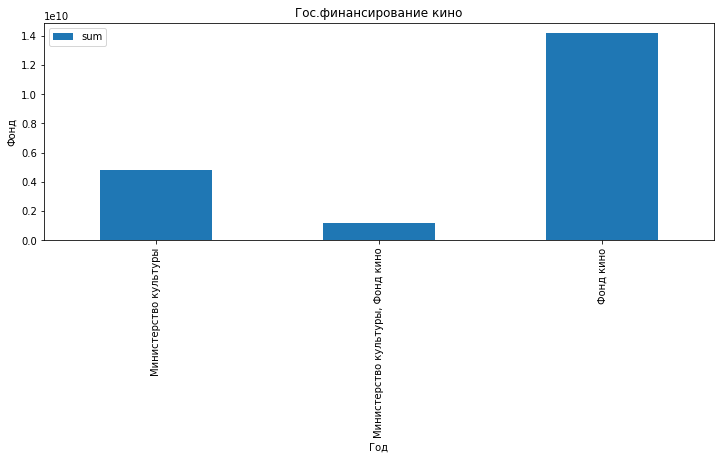

In [59]:
#построим график для таблицы
data_support_financing.plot(y = 'sum', kind = 'bar', figsize=(12, 4), title = 'Гос.финансирование кино', xlabel = 'Год', ylabel = 'Фонд')

Больше всего профинансировано от "Фонд кино" - 144 фильма на общую сумму порядка 13млрд.руб (порядка 70% от всех средств). У него же наибольшее медианное значение - порядка 60млн на один фильм, в то время как у министерства культуры только 28млн/фильм.

In [60]:
#посмотрим сколько всего средств выделяли по годам
data_support_box_office_sum = data_support.pivot_table(index= 'year', values=['support_sum'], aggfunc='sum')
data_support_box_office_sum.columns = ['sum']
data_support_box_office_sum

,sum
year,
2013,134347945.00000
2014,572002299.00000
2015,3656241459.00000
2016,4303155482.00000
2017,3183971662.00000
2018,3446969465.00000
2019,4904000000.00000


<AxesSubplot:title={'center':'Гос.финансирование кино'}, xlabel='Год', ylabel='Объем финансирования'>

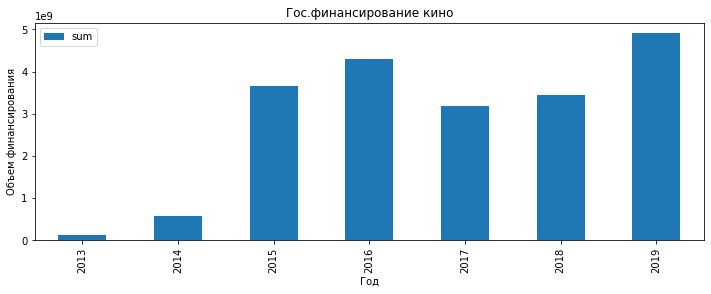

In [61]:
data_support_box_office_sum.plot(y = 'sum', kind = 'bar', figsize=(12, 4), title = 'Гос.финансирование кино', xlabel = 'Год', ylabel = 'Объем финансирования')

Объем финансирования растет, но не линейно. в 2015 году произошел существенный скачок. Наибольшее финансирование пришлось на 2019г. 

In [62]:
#посчитаем окупаемость фильмов с гос поддержкой
payback_support = ((data_support['box_office'].sum() - data_support['budget'].sum()) / data_support['budget'].sum()) *100
payback_support

-3.480742655419327

ROI меньше 100%. Затраты не окупаются.

In [63]:
#для анализа данных по рейтингу введем в таблицу новый столбец ratings_categorize с меньшей детализацией чисел рейтинга
def categorize_ratings(ratings):
    if ratings >= 1 and ratings < 2:
        return '1'
    if ratings >= 2 and ratings < 3:
        return '2'
    if ratings >= 3 and ratings < 4:
        return '3'
    if ratings >= 4 and ratings < 5:
        return '4'
    if ratings >= 5 and ratings < 6:
        return '5'
    if ratings >= 6 and ratings < 7:
        return '6'
    if ratings >= 7 and ratings < 8:
        return '7'
    return '8'

data_support['ratings_categorize'] = data_support['ratings'].apply(categorize_ratings)

/tmp/ipykernel_48/477609014.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_support['ratings_categorize'] = data_support['ratings'].apply(categorize_ratings)


In [64]:
#посмотрим какой рейтинг у фильмов с господдержкой
data_support_ratings = data_support.pivot_table (index = 'ratings_categorize', values = 'puNumber', aggfunc = 'count')
data_support_ratings.columns = ['count']
data_support_ratings

,count
ratings_categorize,
1,1
2,4
3,11
4,33
5,82
6,130
7,47
8,24


<AxesSubplot:title={'center':'Рейтинг фильмов'}, xlabel='Рейтинг', ylabel='Количество фильмов'>

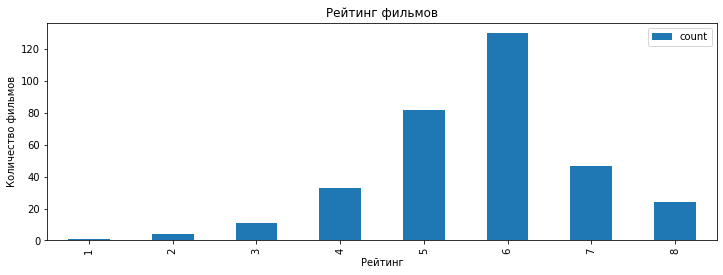

In [65]:
#визуализируем данные таблицы
data_support_ratings.plot(y = 'count', kind = 'bar', figsize=(12, 4), title = 'Рейтинг фильмов', xlabel = 'Рейтинг', ylabel = 'Количество фильмов')

In [66]:
#выведем названия фильмов с рейтингом от 7 
data_support.query('ratings >= 7')['title'].unique()

array(['Пока еще жива', 'А зори здесь тихие..._', 'Призрак_.', 'Ведьма .',
       'Батальонъ', 'Битва за Севастополь', 'Воин (2015)', 'Однажды._',
       'Крепость. Щитом и мечом', '72 часа', 'Частное пионерское-2',
       '28 Панфиловцев', 'Экипаж .', 'ВСЯ НАША НАДЕЖДА...',
       'Человек из будущего', 'Чемпионы: Быстрее. Выше. Сильнее',
       'Тайна Снежной королевы', 'Я-Учитель', 'ХИТ', 'Герой (2015)',
       'Время первых (2017)', 'Рок', 'ТЕНЬ', 'Ура! Каникулы!', 'БОЛЬШОЙ',
       'Простая история .',
       'Колобанга. Только для пользователей Интернета (26 серий)',
       'Мотылёк.', 'Матильда', 'Салют-7', 'Жили-были', 'Первые',
       'Движение вверх',
       'Детский юмористический киножурнал "ЕРАЛАШ", выпуски 312-323',
       'Двое', 'Киноальманах "Свидетели"', 'Один день лета', 'Кровь',
       'Крик тишины', 'Рассвет', 'Солдатик', 'Балканский рубеж',
       'Миллиард', 'Люби их всех', 'Я не такой. Я не такая', 'Подкидыш',
       'Сестренка', 'Байкал - Сердце мира 3D', 'Волш

In [67]:
#данные не с чем сравнить. посмотрим рейтинг фильмов без гос поддержки
def categorize_ratings(ratings):
    if ratings >= 1 and ratings < 2:
        return '1'
    if ratings >= 2 and ratings < 3:
        return '2'
    if ratings >= 3 and ratings < 4:
        return '3'
    if ratings >= 4 and ratings < 5:
        return '4'
    if ratings >= 5 and ratings < 6:
        return '5'
    if ratings >= 6 and ratings < 7:
        return '6'
    if ratings >= 7 and ratings < 8:
        return '7'
    return '8'

data_support_not['ratings_categorize'] = data_support_not['ratings'].apply(categorize_ratings)

#посмотрим какой рейтинг у фильмов без господдержкой
data_support_not_ratings = data_support_not.pivot_table (index = 'ratings_categorize', values = 'puNumber', aggfunc = 'count')
data_support_not_ratings.columns = ['count']
data_support_not_ratings

/tmp/ipykernel_48/3578037837.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_support_not['ratings_categorize'] = data_support_not['ratings'].apply(categorize_ratings)


,count
ratings_categorize,
1,18
2,32
3,112
4,367
5,1100
6,2275
7,1884
8,1363


<AxesSubplot:title={'center':'Рейтинг фильмов (без гос поддержки)'}, xlabel='Рейтинг', ylabel='Количество'>

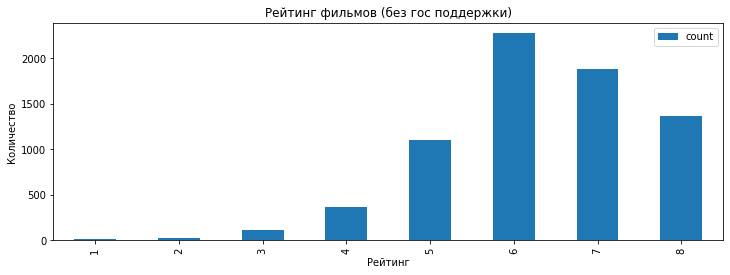

In [68]:
#визуализируем данные таблицы
data_support_not_ratings.plot(y = 'count', kind = 'bar', figsize=(12, 4), title = 'Рейтинг фильмов (без гос поддержки)', xlabel = 'Рейтинг', ylabel = 'Количество')

<AxesSubplot:>

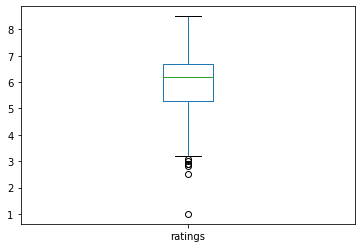

In [69]:
#построим диаграмму размаха для столбца со значениями рейтинга из таблицы с фильмами с господдержкой
import matplotlib.pyplot as plt
data_support.boxplot(column=['ratings'], grid = False)

<AxesSubplot:>

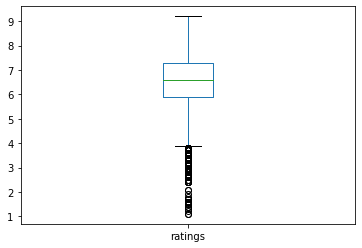

In [70]:
#построим диаграмму размаха для столбца со значениями рейтинга из таблицы с фильмами БЕЗ господдержкой
import matplotlib.pyplot as plt
data_support_not.boxplot(column=['ratings'], grid = False)

И в когорте "с финансирование" и "без финансирование" пик значений рейтинга приходится на "6". Но, в когорте "без финансирования" объем фильмов в категориях с рейтингом "7" и "8" - значительно выше, чем в когорте с фильмами с госфинансированием. 

In [71]:
#посмотрим на какой жанр выделяли больше средств
data_support_genres = data_support.pivot_table(index = 'genres_main', values = 'support_sum', aggfunc = 'sum')
data_support_genres.columns = ['sum']
data_support_genres

,sum
genres_main,
unknown,688969465.00000
биография,112510000.00000
боевик,334000000.00000
военный,422000866.00000
детектив,485000000.00000
детский,119000000.00000
драма,5314406632.00000
история,1020000000.00000
комедия,3218282945.00000


<AxesSubplot:title={'center':'Гос.финансирование кино, разбивка по жанрам'}, xlabel='Жанр', ylabel='Объем финансирования'>

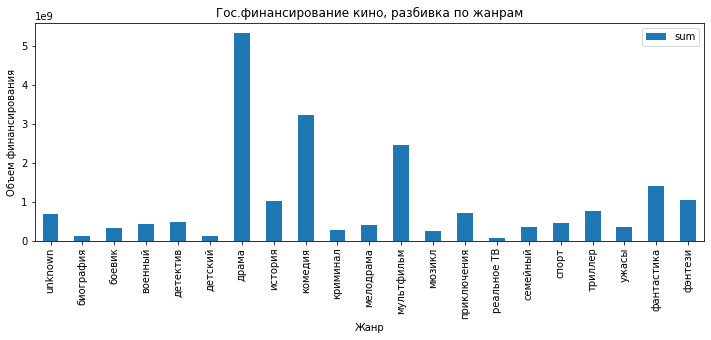

In [72]:
data_support_genres.plot(y = 'sum', kind = 'bar', figsize=(12, 4), title = 'Гос.финансирование кино, разбивка по жанрам', xlabel = 'Жанр', ylabel = 'Объем финансирования')

Больше всего средств было выделено на драмы. Далее идут комедии и мультфильмы.

In [73]:
#добавим в таблицу столбец с информацией об окупаемости каждого фильма
data_support['roi'] = ((data_support['box_office'] - data_support['budget']) / data_support['budget']) *100


/tmp/ipykernel_48/2538580656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_support['roi'] = ((data_support['box_office'] - data_support['budget']) / data_support['budget']) *100


In [74]:
#посмотрим окупаемость по жанрам
data_support_genres_roi = data_support.pivot_table(index = 'genres_main', values = 'roi', aggfunc = 'median')
data_support_genres_roi.columns = ['median']
data_support_genres_roi

,median
genres_main,
unknown,-99.03957
биография,-68.31312
боевик,-56.38742
военный,-81.41818
детектив,-93.51895
детский,-97.26306
драма,-94.45897
история,-49.56141
комедия,-54.10007


Самые высокие значения окупаемости у фильмов в жанре "спорт". 

In [75]:
#посмотрим рейтинги по жанрам
data_support_genres_ratings = data_support.pivot_table(index = 'genres_main', values = 'ratings', aggfunc = 'median')
data_support_genres_ratings.columns = ['median']
data_support_genres_ratings

,median
genres_main,
биография,6.90000
боевик,6.45000
военный,6.40000
детектив,6.80000
детский,7.25000
драма,6.40000
история,5.90000
комедия,5.75000
криминал,7.80000


In [76]:
#посмотрим общие сведения о столбце с информацией об окупаемости
data_support['roi'].describe()

count    318.00000
mean     -17.41764
std      168.76368
min      -99.99830
25%      -97.66268
50%      -82.35797
75%       -3.10399
max     1820.98043
Name: roi, dtype: float64

In [77]:
#создадим сводную таблицу
data_support_roi_year = data_support.pivot_table(index = 'year', values = 'roi', aggfunc = 'median')
data_support_roi_year.columns = ['median']
data_support_roi_year

,median
year,
2013,-94.10111
2014,-93.06576
2015,-90.06986
2016,-84.82859
2017,-50.45284
2018,-65.10523
2019,-76.72116


<AxesSubplot:title={'center':'ROI по фильмам с господдержкой'}, xlabel='Год', ylabel='ROI'>

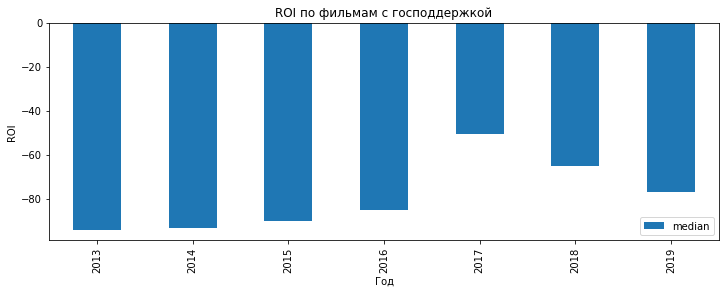

In [78]:
data_support_roi_year.plot(y = 'median', kind = 'bar', figsize=(12, 4), title = 'ROI по фильмам с господдержкой', xlabel = 'Год', ylabel = 'ROI')

Самый удачный год по окупаемости - 2017. 

In [79]:
#посмотрим какие сборы у фильмов с господдержкой
data_support_box_office = data_support.pivot_table (index = 'year', values = 'box_office', aggfunc = 'sum')
data_support_box_office.columns = ['sum']
data_support_box_office

,sum
year,
2013,20322385.10000
2014,1017422166.60000
2015,5785285418.14000
2016,6081707839.10000
2017,10865075300.96000
2018,9934069010.25000
2019,8409627454.63000


<AxesSubplot:title={'center':'Сборы в руб по фильмам с господдержкой'}, xlabel='Год', ylabel='Сумма сборов'>

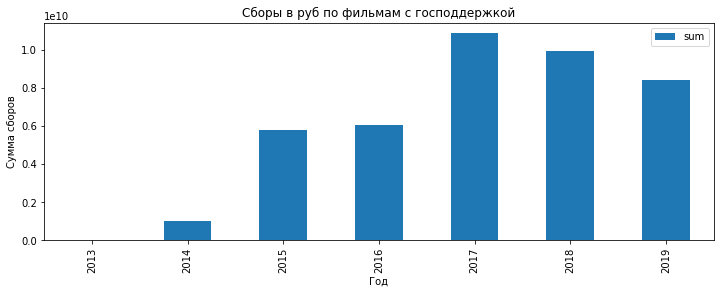

In [80]:
data_support_box_office.plot(y = 'sum', kind = 'bar', figsize=(12, 4), title = 'Сборы в руб по фильмам с господдержкой', xlabel = 'Год', ylabel = 'Сумма сборов')

In [81]:
#посмотрим какие сборы у фильмов в среднем на фильм
data_support_box_office_one = data_support.pivot_table (index = 'year', values = ['box_office'], aggfunc = ['sum', 'count'])
data_support_box_office_one.columns = ['sum', 'count']
data_support_box_office_one['box_office_one_cinema'] = data_support_box_office_one['sum'] / data_support_box_office_one['count']
data_support_box_office_one

,sum,count,box_office_one_cinema
year,,,
2013,20322385.10000,2,10161192.55000
2014,1017422166.60000,16,63588885.41250
2015,5785285418.14000,85,68062181.38988
2016,6081707839.10000,60,101361797.31833
2017,10865075300.96000,39,278591674.38359
2018,9934069010.25000,56,177394089.46875
2019,8409627454.63000,60,140160457.57717


<AxesSubplot:title={'center':'Средняя сумма сборов с фильма с гос.поддержкой'}, xlabel='Год', ylabel='Средняя сумма сбора с фильма'>

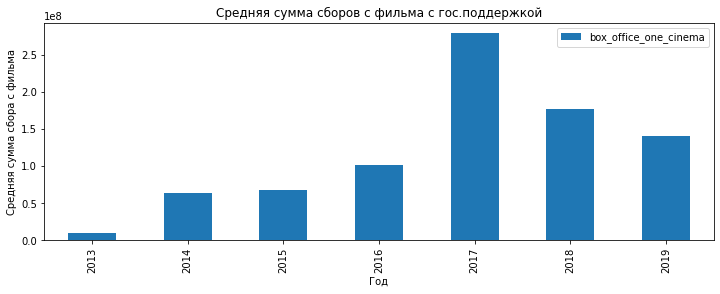

In [82]:
data_support_box_office_one.plot(y = 'box_office_one_cinema', kind = 'bar', figsize=(12, 4), title = 'Средняя сумма сборов с фильма с гос.поддержкой', xlabel = 'Год', ylabel = 'Средняя сумма сбора с фильма')

In [83]:
#выведем названия фильмов с наибольшим количеством сборов в 2017 году
data_support.query('box_office > 600000000 & year == 2017')['title'].unique()

array(['Салют-7', 'Последний богатырь', 'Ёлки Новые', 'Движение вверх',
       'Три богатыря и принцесса Египта'], dtype=object)

In [84]:
#посмотрим какая средняя окупаемость у фильмов с наибольшими сборами
data_support.query('box_office > 600000000')['roi'].median()

325.2521824225329

In [85]:
#выведем названия фильмов с ROI больше 100 (то есть с теми, что окупились)
data_support.query('roi > 100')['title'].unique()

array(['Призрак_.', 'Дуxless 2', 'Битва за Севастополь',
       '8 новых свиданий', 'Воин (2015)', 'Бармен.', 'Без границ',
       'Самый Лучший День', 'Страна чудес', 'Срочно выйду замуж',
       '28 Панфиловцев', 'Помню - не помню!', 'Экипаж .',
       'Иван Царевич и Серый Волк 3', 'Кухня. Последняя битва',
       'Гуляй, Вася !', 'Невеста .', 'Притяжение (2016)',
       'Последний богатырь', 'Ёлки Новые', 'Движение вверх',
       'Три богатыря и принцесса Египта', 'Селфи', 'Лёд',
       'О чем говорят мужчины. Продолжение', 'Я худею', 'Тренер',
       'Русалка. Озеро мертвых', 'Непрощенный',
       'Три богатыря и наследница престола', 'Ёлки Последние', 'Т-34',
       'Бабушка лёгкого поведения 2', 'Балканский рубеж',
       'Трезвый водитель', 'Верность', 'Давай разведемся!', 'Холоп',
       'Иван Царевич и Серый Волк 4'], dtype=object)

Наибольшие сборы принесли фильмы вышедшие в 2017 году. 
Фильмы, которые окупились: 'Призрак_.', '14+', 'Дуxless 2', 'Битва за Севастополь', '8 новых свиданий', 'Воин (2015)', 'Бармен.', 'Савва. Сердце воина', 'Тряпичный союз', 'Без границ', 'Самый Лучший День', 'Страна чудес', 'Срочно выйду замуж', '28 Панфиловцев', 'Помню - не помню!', 'Экипаж .', 'Любовь с ограничениями', 'Иван Царевич и Серый Волк 3', 'Кухня. Последняя битва', 'Гуляй, Вася !', 'Невеста .', 'Притяжение (2016)', 'Чудо-юдо', 'Мифы', 'Последний богатырь', 'Ёлки Новые', 'Движение вверх', 'Три богатыря и принцесса Египта', 'Селфи', 'Лёд', 'О чем говорят мужчины. Продолжение', 'Я худею', 'Два хвоста', 'Тренер', 'Русалка. Озеро мертвых', 'Принцесса и дракон', 'Непрощенный', 'Баба Яга', 'Три богатыря и наследница престола', 'Ёлки Последние', 'Т-34', 'Бабушка лёгкого поведения 2', 'Балканский рубеж', 'Трезвый водитель', 'Большое путешествие', 'Верность', 'Давай разведемся!', 'Холоп', 'Иван Царевич и Серый Волк 4'],

### Шаг 5. Общие выводы

5.1. Подготовительный этап

В хоте исследования нами были обработаны данные, полученные из файлов '/datasets/mkrf_movies.csv' и '/datasets/mkrf_shows.csv'. Данные содержат информацию о рынке российского кинопроката - о фильмах, получивших прокатные удостоверения за период 2010 - 2019гг, информацию о дате премьеры, стране-производителе, возрастной категории, объеме госфинансирования, рейтинге, сборах и др. 

В ходе исследования на предварительном этапе были проведены следующие работы: 
- объеденены данные из двух таблиц;
- изменен тип данных для столбцаов show_start_date и ratings;
- удаленены строки с отсутствующими данными и дубли в puNumber;
- обработаны пропуски данных в genres и director;
- обработаны значения в type; 
- изучены данных в столбцах с категориальными значениями. выявлена проблема, присущая большинству столбцов с таким типом информации: в столбцах много неявных дубликатов;
- для фильмов с господдержкой заполнены отсутствующие значения в "общий бюджет". 

Для полноты анализа были добавлены новые столбцы:
- год выхода фильма в прокат;
- основной жанр фильма;
- главный режиссер;
- общий объем финансирования от государства;
- категория рейтинга.

5.2 Выводы по целям исследования
Общие выводы: 
- в периоде 2010 - 2019гг. прокатное удостоверение было выдано 7 483. Из них только 3 158 фильмов вышли в прокат в кинотеатры. Ситуация сильно изменилась в 2015г - в прокат стали выходить 50-70% фильмов;
- минимальная сумма сборов была в 2010 году (порядка 2млрд.руб.), максимальная в 2017 году (порядка 48млрд.руб.);
- средняя сумма сборов и медианная сумма сборов по годам отличаются. максимальные значения были достигнуты в 2017 года - порядка 10млн медиана, и порядка 136млн среднее. в последующие года эти показатели несколько снизились;
- в каждом исследуемом периоде средняя и медианные значения значительно различаются (более чем в 20р). Так, например, в 2016г: средняя = 91 000 569р, медиана = 3 846 679р. В 2019г: средняя = 91 369 261р, медианная = 4 627 798р. Это можно объяснить тем, что в каждом периоде есть суперкассовые фильмы (мировые премьеры получившие в т.ч. большую медийную и промоподдержку) - такие фильмы единичны.  
- возрастное ограничение влияет на сумму сборов. Так, наибольшие сборы у фильмов 16+ (эта категория также лидер в общем количестве фильмов). Далее идут сборы у 12+ и 6+;
- ситуация менялась в 2018г, когда лидером, наряду с фильмами 16+, стали фильмы с возрастным ограничением 12+;
- также ситуация несколько отличалась в 2019г, когда лидером по сборам стали фильмы из категории 6+. Вероятно, в эти годы выходили кассовые фильмы в категориях с данными возрастными ограничениями. 

Общие выводы по фильмам с господдержкой:
- всего 329 фильмов получил господдержку в период с 2010 по 2019гг.;
- объем невозвратной господдержки порядка 15,8млрд.руб.;
- объем возвратной господдержки порядка 3,8млрд.руб.;
- общий объем господдержки в периоде 2010-2019гг составил порядка 19,6млрд.руб.;
- больше всего профинансировано от "Фонд кино" - 144 фильма на общую сумму порядка 13млрд.руб (порядка 70% от всех средств). У него же наибольшее медианное значение - порядка 60млн на один фильм, в то время как у Министерства культуры только 28млн/фильм;
- roi окупаемости фильмов с гос.поддержкой меньше 100%. В общей сумме затраты не окупаются;
- у фильмов с господдержкой больше всего фильмов с рейтингом "6". мы сравнили данные с фильмами без господдержки. в данной когорте так же больше фильмов с рейтингом "6", но "хвост" фильмов с рейтингом "7/8" - больше;
- список фильмов с рейтингом больше 7:
'Пока еще жива', 'А зори здесь тихие..._', 'Призрак_.', 'Ведьма .', 'Батальонъ', 'Битва за Севастополь', 'Воин (2015)', 'Однажды._', 'Крепость. Щитом и мечом', '72 часа', 'Частное пионерское-2', '28 Панфиловцев', 'Экипаж .', 'ВСЯ НАША НАДЕЖДА...', 'Человек из будущего', 'Чемпионы: Быстрее. Выше. Сильнее', 'Тайна Снежной королевы', 'Я-Учитель', 'ХИТ', 'Герой (2015)', 'Время первых (2017)', 'Рок', 'ТЕНЬ', 'Ура! Каникулы!', 'БОЛЬШОЙ', 'Простая история .', 'Колобанга. Только для пользователей Интернета (26 серий)', 'Мотылёк.', 'Матильда', 'Салют-7', 'Жили-были', 'Первые', 'Движение вверх', 'Детский юмористический киножурнал "ЕРАЛАШ", выпуски 312-323', 'Двое', 'Киноальманах "Свидетели"', 'Один день лета', 'Кровь', 'Крик тишины', 'Рассвет', 'Солдатик', 'Балканский рубеж', 'Миллиард', 'Люби их всех', 'Я не такой. Я не такая', 'Подкидыш', 'Сестренка', 'Байкал - Сердце мира 3D', 'Волшебник', 'Герой', 'РОБО', 'Фиксики против кработов';
- самые высокие рейтинги у фильмов в жанре "криминал" (7,8), далее "детский" (7,2) и "спорт" (7);
- больше всего средств было выделено на драмы. Далее идут комедии и мультфильмы;
- самые высокие значения окупаемости у фильмов в жанре "спорт";
- больше всего сборов принесли фильмы вышедшие в 2017 году;
- в 2017 году каждый вышедший фильм с господдрежкой принес сборов на  278млн.руб в среднем;
- фильмы принесшие наибольшее количество сборов в 2017 году: 'Салют-7', 'Последний богатырь', 'Ёлки Новые', 'Движение вверх', 'Три богатыря и принцесса Египта';
- фильмы, окупившиеся в прокате: 'Призрак_.', '14+', 'Дуxless 2', 'Битва за Севастополь', '8 новых свиданий', 'Воин (2015)', 'Бармен.', 'Савва. Сердце воина', 'Тряпичный союз', 'Без границ', 'Самый Лучший День', 'Страна чудес', 'Срочно выйду замуж', '28 Панфиловцев', 'Помню - не помню!', 'Экипаж .', 'Любовь с ограничениями', 'Иван Царевич и Серый Волк 3', 'Кухня. Последняя битва', 'Гуляй, Вася !', 'Невеста .', 'Притяжение (2016)', 'Чудо-юдо', 'Мифы', 'Последний богатырь', 'Ёлки Новые', 'Движение вверх', 'Три богатыря и принцесса Египта', 'Селфи', 'Лёд', 'О чем говорят мужчины. Продолжение', 'Я худею', 'Два хвоста', 'Тренер', 'Русалка. Озеро мертвых', 'Принцесса и дракон', 'Непрощенный', 'Баба Яга', 'Три богатыря и наследница престола', 'Ёлки Последние', 'Т-34', 'Бабушка лёгкого поведения 2', 'Балканский рубеж', 'Трезвый водитель', 'Большое путешествие', 'Верность', 'Давай разведемся!', 'Холоп', 'Иван Царевич и Серый Волк 4
- среди фильмов получивших господдержку есть фильмы интересные пользователю (с высоким рейтингом) и фильмы окупившиеся в прокате (roi выше 100). Подробный анализ сценариев этих картин, а также их промоподдержки позволит составить критерии фильма для того чтобы он окупился в прокате.

Общие рекомендации:
- обработать столбец с данными о стране-производителе фильма. проанализировать, фильмы из каких стран чаще получают прокатные удостоверения, проанализировать, фильмы из каких стран имеют большие прокатные сборы;
- добавить данные о господдержке фильмов в других странах - сравнить тренды и окупаемость;
- добавить данные об общем бюджете на производство фильмов зарубежных производителей. выявить тренды их окупаемости (зависимости  с датой премьеры, жанром, рейтингом);
- добавить данные о промоподдержке. выяснить, если ли корреляция с величиной сборов. выяснить, на сколько промоподдержка увеличивает сборы (в случае, если такая зависимость есть);
- среди фильмов отечественного производства проанализировать какие студии имеют большие успех в прокате (рекомендовать к работе данные студии);
- добавить для анализа информацию не только о сборах в кинотеатрах. но и сборах в онлайн-кинотеатрах. проанализировать тренды онлайн-кинотеатров - если ли различие в топе лидеров. попробовать определить какая стратегия запуска лучше: сначала кинотеатр, потом онлайн-кинотеатр, наоборот или одномоментный запуск. попробовать определить, возможно для разных жанров удачней разные стратегии.